In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import warnings


from sklearn.cluster import KMeans



py.offline.init_notebook_mode(connected = True)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dados/dataset.csv')
print(df.shape)
df.head()

(260645, 7)


id_transacao       horario_pedido  localidade  nome_item  quantidade_item  \
0     0x7901ee  2019-01-16 18:33:00           7     bebida                2   
1     0x7901ee  2019-01-16 18:33:00           7      pizza                2   
2     0x7901ee  2019-01-16 18:33:00           7  sobremesa                2   
3     0x12b47f  2019-09-04 12:36:00           3     salada                1   
4     0x12b47f  2019-09-04 12:36:00           3  sobremesa                1   

    latitude  longitude  
0  41.794132 -88.010140  
1  41.794132 -88.010140  
2  41.794132 -88.010140  
3  41.884490 -87.627059  
4  41.884490 -87.627059

# Pivot Table

In [3]:
df_pivot = df.pivot_table(index='id_transacao', columns='nome_item', values='quantidade_item')

In [4]:
df_pivot = df_pivot.fillna(0).reset_index()
df_pivot.head()

nome_item id_transacao  bebida  pizza  salada  sobremesa
0             0x10000a     0.0    1.0     0.0        1.0
1             0x100058     0.0    2.0     0.0        2.0
2             0x1000c8     4.0    4.0     1.0        5.0
3             0x10014c     0.0    1.0     0.0        1.0
4             0x1001d8     3.0    3.0     0.0        3.0

In [5]:
df_pivot = df_pivot.merge(df[['id_transacao', 'horario_pedido', 'localidade']]).drop_duplicates()
df_pivot.head()

id_transacao  bebida  pizza  salada  sobremesa       horario_pedido  \
0      0x10000a     0.0    1.0     0.0        1.0  2019-01-29 00:48:00   
2      0x100058     0.0    2.0     0.0        2.0  2019-05-05 00:08:00   
4      0x1000c8     4.0    4.0     1.0        5.0  2019-01-28 19:24:00   
8      0x10014c     0.0    1.0     0.0        1.0  2019-02-23 00:15:00   
10     0x1001d8     3.0    3.0     0.0        3.0  2019-06-30 17:50:00   

    localidade  
0            9  
2            6  
4            9  
8            6  
10           2

In [6]:
df_pivot['mes'] = df_pivot['horario_pedido'].apply(lambda x: pd.to_datetime(x).month)

# Analise Descritiva

<AxesSubplot:xlabel='localidade', ylabel='count'>

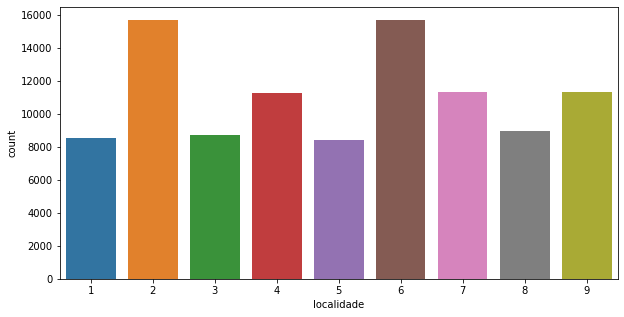

In [7]:
plt.figure(figsize=(10,5))
sns.countplot('localidade', data=df_pivot)

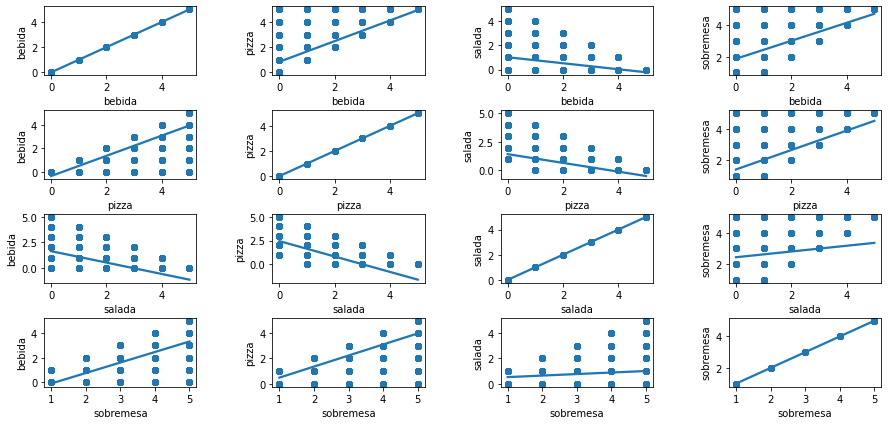

CPU times: user 2min 28s, sys: 19 s, total: 2min 47s
Wall time: 1min 40s


In [8]:
%%time

plt.figure(1, figsize=(15,7))
columns = ['bebida', 'pizza', 'salada', 'sobremesa']

n = 0
for i in columns:
    for j in columns:
        n += 1
        plt.subplot(4,4,n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x=i, y=j, data=df_pivot)
        plt.ylabel(j)

plt.show()

# Utilitarios


In [9]:
def plot_elbow(X):
    
    distortions = []

    K = range(2,10)

    for k in K:
        kmeansModel = KMeans(n_clusters=k)
        kmeansModel.fit(X1)
        distortions.append(kmeansModel.inertia_)
        
    plt.figure(figsize=(16,8))

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal K')
    plt.show()


In [25]:
def plot_mesh(X, model, x, y, labels):
    centroids1 = model.cluster_centers_

    # Plot
    # Parâmetros do Meshgrid
    h = 0.02
    x_min, x_max = X[x].min() - 1, X[x].max() + 1
    y_min, y_max = X[y].min() - 1, X[y].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    plt.figure(1 , figsize = (15, 7) )
    plt.clf()
    Z = Z.reshape(xx.shape)

    # Plot da imagem
    plt.imshow(Z, 
               interpolation = 'nearest', 
               extent = (xx.min(), xx.max(), yy.min(), yy.max()),
               cmap = plt.cm.Set2, 
               aspect = 'auto', 
               origin = 'lower')

    # Plot dos pontos de dados
    plt.scatter( x = x, y = y, data = X, c = labels, s = 200 )
    plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.show()

# Segmentação 01

## Pizza e Sobremesa

In [11]:
X1 = df_pivot[['pizza', 'sobremesa']]

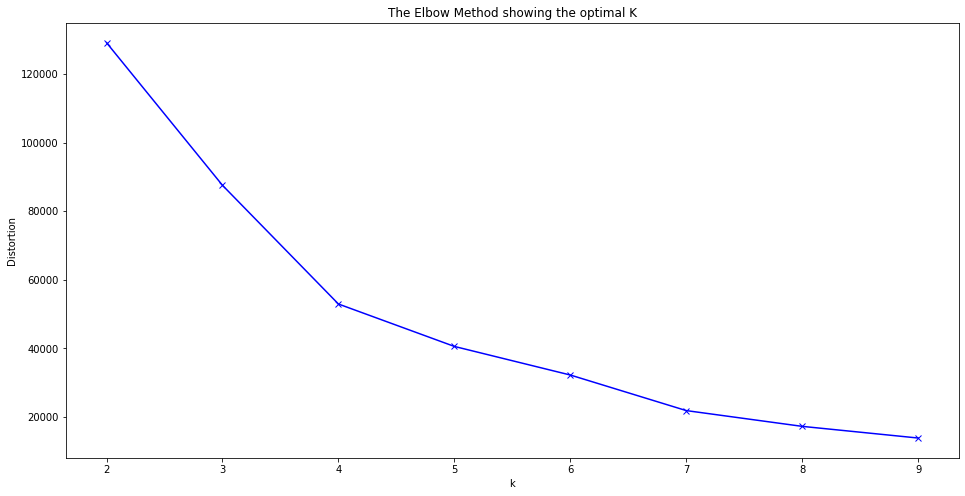

In [12]:
plot_elbow(X1)

In [19]:
kmeansModel_01 = KMeans(n_clusters=2)
kmeansModel_01.fit(X1)

KMeans(n_clusters=2)

In [15]:
labels = kmeansModel_01.predict(X1)

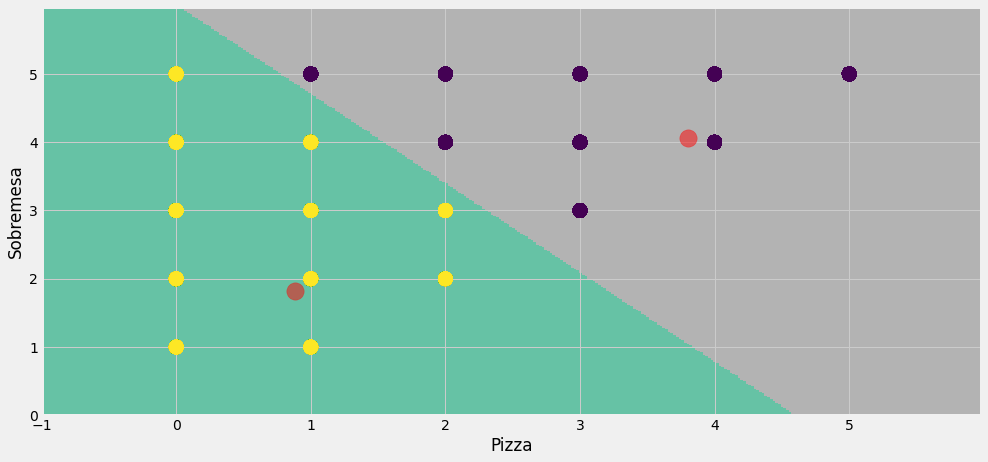

In [26]:
plot_mesh(X1, kmeansModel_01, 'pizza', 'sobremesa', labels)

### Interpretação

* O cluster 1 (verde) - Clientes que pedem pouca pizza, mas sempre pedem sobremesa

* O cluster 2 (cinza) - Clientes que pedem mais pizza e mais sobremesas.

### Analise

* A equipe de marketing pode trabalhar em uma promoção de uma sobremesa para os clientes que comprem + 1 pizza.

# Segmentação 02

## Pizza e Salada

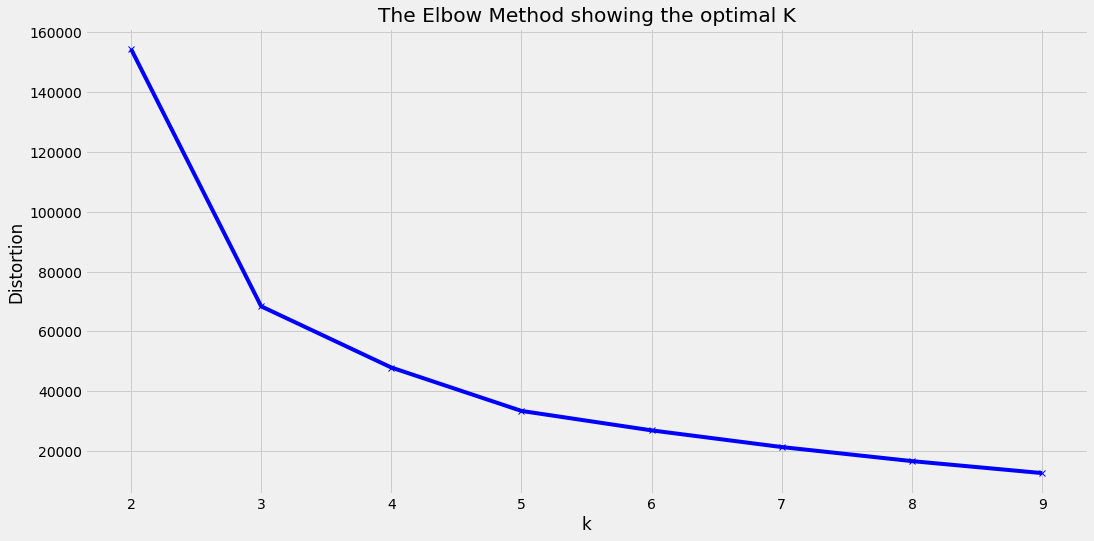

In [27]:
X1 = df_pivot[['pizza', 'salada']]

plot_elbow(X1)

In [28]:
kmeansModel_02 = KMeans(n_clusters=3)
kmeansModel_02.fit(X1)

KMeans(n_clusters=3)

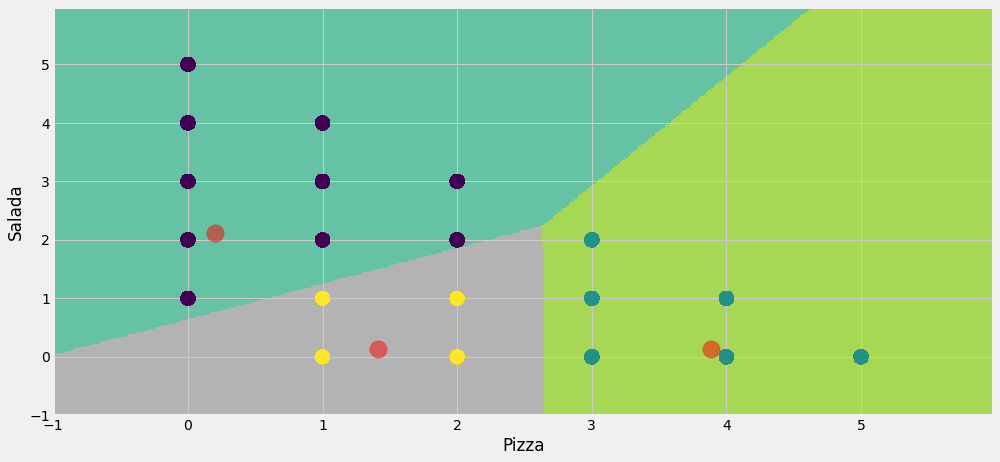

In [31]:
labels = kmeansModel_02.labels_

plot_mesh(X1, kmeansModel_02, 'pizza', 'salada', labels)

### Interpretação

* No cluter 1 (cinza) - Clientes que pedem pouca pizza e pouca salada

* No cluster 2 (verde) - Clientes que pedem + salada 

* No clsuter 3 (verde claro) - Clientes que pedem + pizza

### Analise

* Ao se concentrar no cluster um temos um ganho de girar o estoque uma vez que o mix de protudo é variado. 
* Recomenda-se um estudo mais aprofundado para identificar qual dos protudos tem maior margem de lucro. 

# Segmentação 03

## Pizza e Localização

In [32]:
X1 = df_pivot[['pizza', 'localidade']]

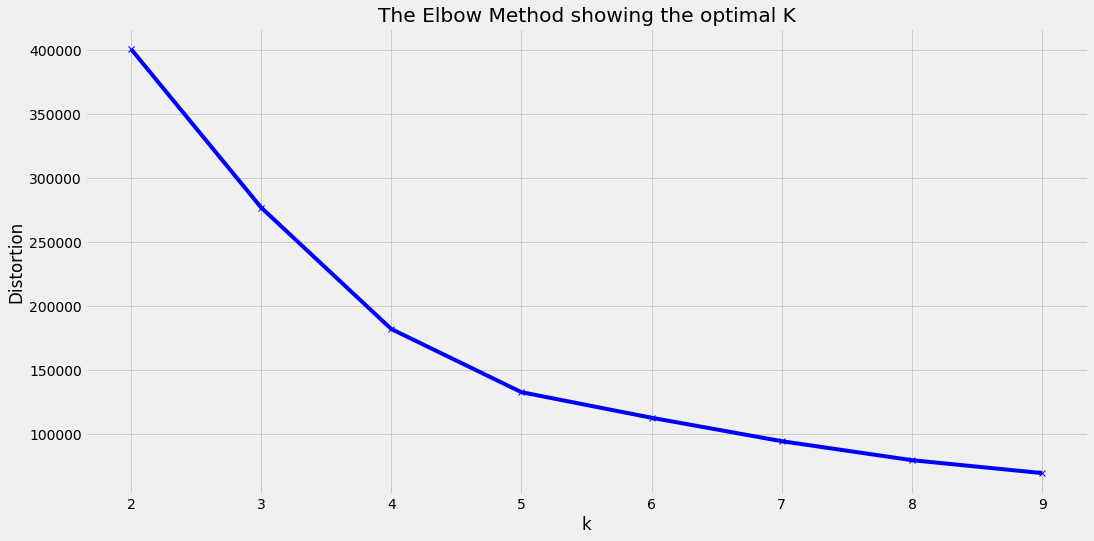

In [33]:
plot_elbow(X1)

In [34]:
kmeansModel_03 = KMeans(n_clusters=4)
kmeansModel_03.fit(X1)

KMeans(n_clusters=4)

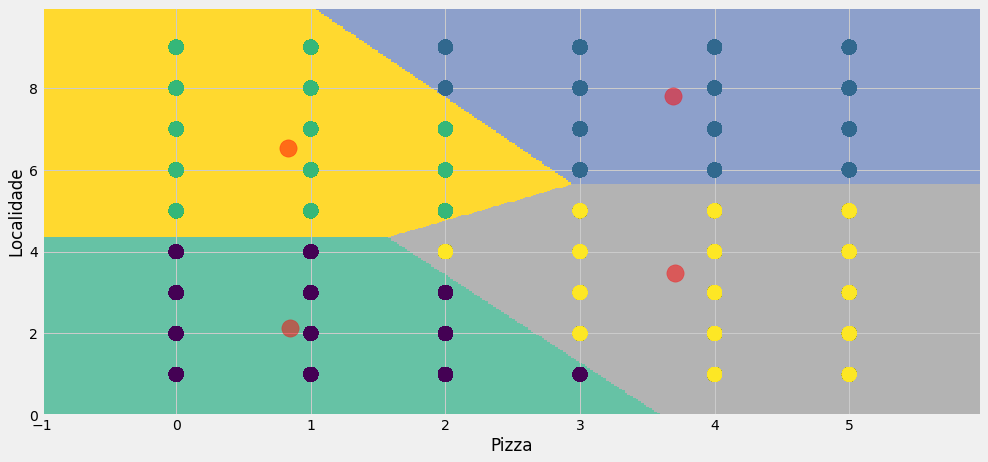

In [35]:
labels = kmeansModel_03.labels_

plot_mesh(X1, kmeansModel_03, 'pizza', 'localidade', labels)

### Interpretação

* Os clusters a esquerda do grafico são as localidades com menos vendas de pizza.

* Os cluters a direita do grafico são as localidades com mais vendas de pizza.

### Analise

* Realizar um estudo aprofundado para tentar identificar o que as lojas com + vendas estão fazendo para replicar para as demais.

# Segmentação 04

## Pizza, Salada e Localidade

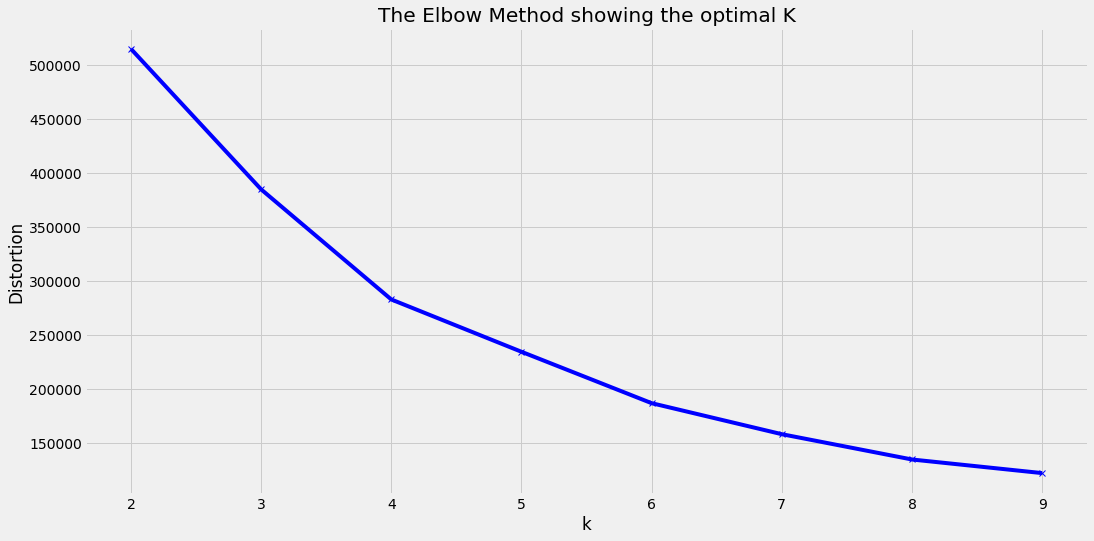

In [36]:
X1 = df_pivot[['pizza', 'salada', 'localidade']]

plot_elbow(X1)

In [37]:
kmeansModel_04 = KMeans(n_clusters=4)
kmeansModel_04.fit(X1)

KMeans(n_clusters=4)

In [43]:
labels = kmeansModel_04.labels_

grafico = go.Scatter3d(x=df_pivot['pizza'], y=df_pivot['salada'], z=df_pivot['localidade'],
                       mode = 'markers', 
                       marker = dict(color = labels, 
                                     size = 4,
                                     line = dict(color = labels, width = 15),
                                     opacity = 0.7))

layout = go.Layout(title = 'Clustrs', scene=dict(xaxis = dict(title  = 'Pizza'),
                                yaxis = dict(title  = 'Salada'),
                                zaxis = dict(title  = 'Localidade')))

fig = go.Figure(data= grafico, layout=layout)
py.offline.iplot(fig)

# Segmentação 05 - Dataset final

## Pizza, Salada e Sobremesa

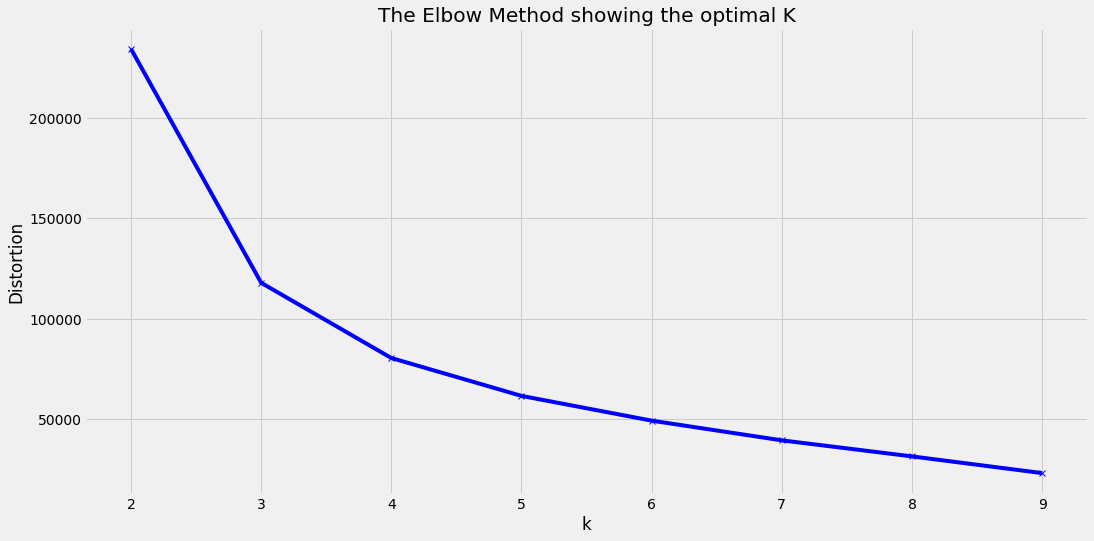

In [47]:
X1 = df_pivot[['pizza', 'salada', 'sobremesa']]

plot_elbow(X1)

In [55]:
kmeansModel_05 = (KMeans(n_clusters = 2,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan') )
kmeansModel_05.fit(X1)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [56]:
labels = kmeansModel_05.labels_

In [57]:
df_pivot['clusters'] = labels
df_pivot.head()

id_transacao  bebida  pizza  salada  sobremesa       horario_pedido  \
0      0x10000a     0.0    1.0     0.0        1.0  2019-01-29 00:48:00   
2      0x100058     0.0    2.0     0.0        2.0  2019-05-05 00:08:00   
4      0x1000c8     4.0    4.0     1.0        5.0  2019-01-28 19:24:00   
8      0x10014c     0.0    1.0     0.0        1.0  2019-02-23 00:15:00   
10     0x1001d8     3.0    3.0     0.0        3.0  2019-06-30 17:50:00   

    localidade  mes  clusters  
0            9    1         1  
2            6    5         1  
4            9    1         0  
8            6    2         1  
10           2    6         0